In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chess_games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


questions i have:
who wins more white or black (bar or pie)
the percentage of winning by winning style (horizontal stacked bar chart)


In [4]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [5]:
df.duplicated().sum()

429

In [6]:
df.drop_duplicates(inplace=True)

In [35]:
df['average_rating'] = (df['white_rating'] + df['black_rating'])/2
df['elo_difference'] = abs(df['white_rating'] - df['black_rating'])

In [8]:
df['average_rating'].min(), df['average_rating'].max()

(816.5, 2475.5)

In [53]:
def categorize_elo(rating):
    if rating < 900:
        return '800-900'
    elif rating < 1000:
        return '900-1000'
    elif rating < 1100:
        return '1000-1100'
    elif rating < 1200:
        return '1100-1200'
    elif rating < 1300:
        return '1200-1300'
    elif rating < 1400:
        return '1300-1400'
    elif rating < 1500:
        return '1400-1500'
    elif rating < 1600:
        return '1500-1600'
    elif rating < 1700:
        return '1600-1700'
    elif rating < 1800:
        return '1700-1800'
    elif rating < 1900:
        return '1800-1900'
    elif rating < 2000:
        return '1900-2000'
    elif rating < 2100:
        return '2000-2100'
    elif rating < 2200:
        return '2100-2200'
    elif rating < 2300:
        return '2200-2300'
    elif rating < 2400:
        return '2300-2400'
    else:
        return '2400-2500'

df['elo_range'] = df['average_rating'].apply(categorize_elo)

In [ ]:
df_times = df[['created_at', 'last_move_at']].copy()
df_times['created_at_dt'] = pd.to_datetime(df_times['created_at']/1000, unit = 's', origin='unix')
df_times['last_move_at_dt'] = pd.to_datetime(df_times['last_move_at']/1000, unit = 's', origin='unix')
df_times

,created_at,last_move_at,created_at_dt,last_move_at_dt
0,1.504210e+12,1.504210e+12,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000
1,1.504130e+12,1.504130e+12,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
2,1.504130e+12,1.504130e+12,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
3,1.504110e+12,1.504110e+12,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000
4,1.504030e+12,1.504030e+12,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000
...,...,...,...,...
20053,1.499791e+12,1.499791e+12,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975
20054,1.499698e+12,1.499699e+12,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092
20055,1.499698e+12,1.499698e+12,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903
20056,1.499696e+12,1.499697e+12,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935


C:\Users\Daniel\AppData\Local\Temp\ipykernel_3732\4170412598.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])


Text(0.5, 1.0, 'Result of Game by Victory Type')

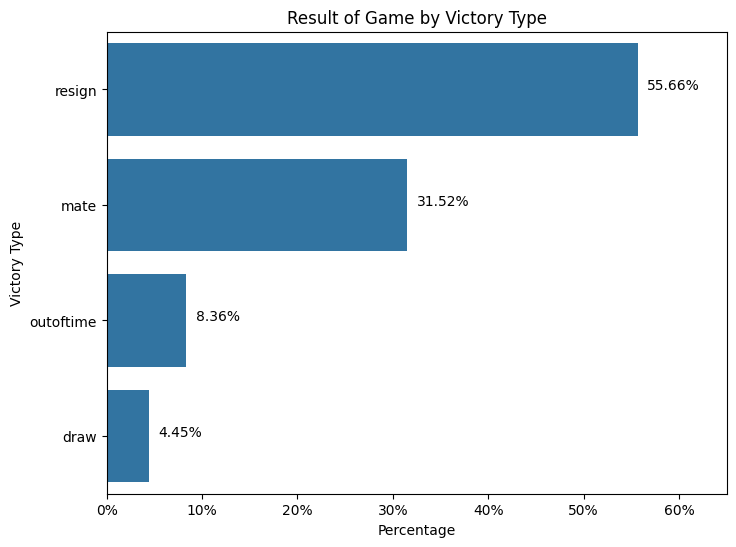

In [36]:
victory = df['victory_status'].value_counts(normalize=True).reset_index()
victory.rename(columns = {'proportion': 'percentage'}, inplace = True)
victory['percentage'] = victory['percentage'] * 100

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(victory, x = 'percentage', y = 'victory_status')

ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])

for i, r in victory.iterrows():
    ax.text(r['percentage'] + 1, i, f'{r['percentage']:.2f}%')

plt.xlim(0,65)
plt.ylabel('Victory Type')
plt.xlabel('Percentage')
plt.title('Result of Game by Victory Type')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3732\4290366155.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(winner_counts, x = 'percentage', y = 'winner', palette=colors)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_3732\4290366155.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(y)}%' for y in ax.get_xticks()])


Text(0.5, 1.0, 'Result of Games by Color')

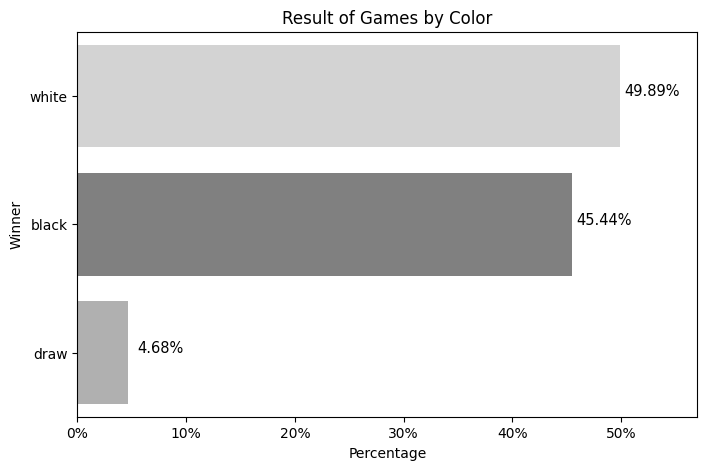

In [49]:
winner_counts = df['winner'].value_counts(normalize=True).reset_index()
winner_counts.rename(columns = {'proportion': 'percentage'}, inplace = True)
winner_counts['percentage'] = winner_counts['percentage'] * 100

fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d3d3d3', '#808080', '#b0b0b0']
sns.barplot(winner_counts, x = 'percentage', y = 'winner', palette=colors)

for i, r in winner_counts.iterrows():
    ax.text(r['percentage'] + 3, i, f'{r['percentage']:.2f}%', ha = 'center', fontsize = 10.5)

ax.set_xticklabels([f'{int(y)}%' for y in ax.get_xticks()])
plt.xlim(0,57)
plt.xlabel('Percentage')
plt.ylabel('Winner')
plt.title('Result of Games by Color')

In [55]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,average_rating,elo_difference,elo_range
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5,309,1300-1400
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,61,1200-1300
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,4,1400-1500
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5,15,1400-1500
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0,54,1400-1500


In [85]:
elo_range = df.groupby('elo_range')['winner'].value_counts(normalize=True).reset_index()
df_pivot = elo_range.pivot(index='elo_range', columns='winner', values='proportion')
elo_range

,elo_range,winner,proportion
0,1000-1100,white,0.491228
1,1000-1100,black,0.449123
2,1000-1100,draw,0.059649
3,1100-1200,white,0.505222
4,1100-1200,black,0.445170
5,1100-1200,draw,0.049608
6,1200-1300,white,0.519791
7,1200-1300,black,0.448842
8,1200-1300,draw,0.031367
9,1300-1400,white,0.515955


In [89]:
df_pivot = pd.crosstab(df['elo_range'], df['winner'], normalize='index')
df_pivot

winner,black,draw,white
elo_range,,,
1000-1100,0.449123,0.059649,0.491228
1100-1200,0.445170,0.049608,0.505222
1200-1300,0.448842,0.031367,0.519791
1300-1400,0.445843,0.038202,0.515955
1400-1500,0.458774,0.038760,0.502467
1500-1600,0.460191,0.042038,0.497771
1600-1700,0.444578,0.042169,0.513253
1700-1800,0.464709,0.055898,0.479394
1800-1900,0.453555,0.056766,0.489679


<Axes: ylabel='elo_range'>

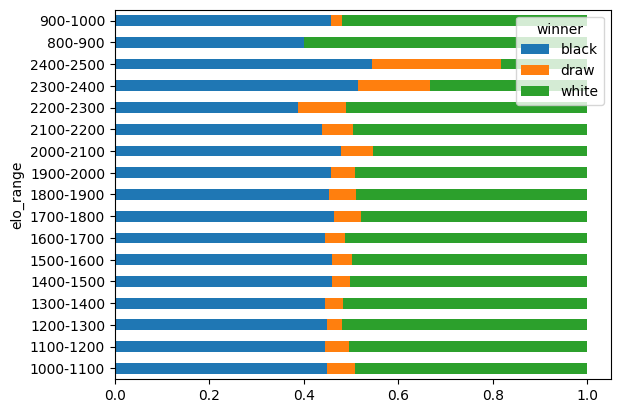

In [84]:
df_pivot.plot(kind = 'barh', stacked = True)